In [1]:
import numpy as np
import pandas as pd 

import pandas_datareader.data as web

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
gdp = web.DataReader(name='GDP', data_source='fred', start='1980-1', end='2023-12' )
gdp

,GDP
DATE,
1980-01-01,2789.842
1980-04-01,2797.352
1980-07-01,2856.483
1980-10-01,2985.557
1981-01-01,3124.206
...,...
2022-10-01,26770.514
2023-01-01,27216.445
2023-04-01,27530.055


In [3]:
gdp.index = gdp.index.to_period(freq='Q')
gdp

,GDP
DATE,
1980Q1,2789.842
1980Q2,2797.352
1980Q3,2856.483
1980Q4,2985.557
1981Q1,3124.206
...,...
2022Q4,26770.514
2023Q1,27216.445
2023Q2,27530.055


<Axes: xlabel='DATE'>

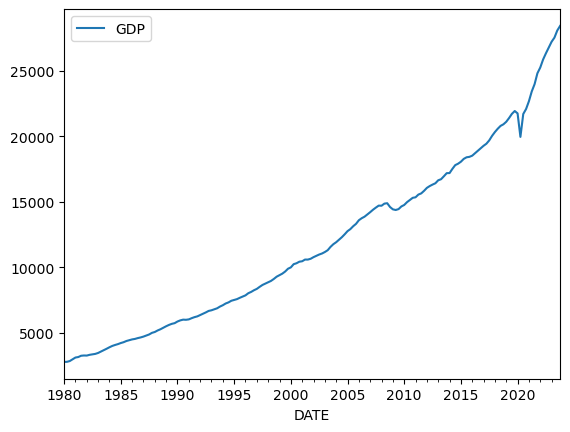

In [4]:
gdp.plot()

In [5]:
rates = web.DataReader(name=['TB3MS', 'TB1YR', 'GS10'], data_source='fred',start='1990-01', end='2023-12')
rates

,TB3MS,TB1YR,GS10
DATE,,,
1990-01-01,7.64,7.38,8.21
1990-02-01,7.74,7.55,8.47
1990-03-01,7.90,7.76,8.59
1990-04-01,7.77,7.80,8.79
1990-05-01,7.74,7.73,8.76
...,...,...,...
2023-08-01,5.30,5.09,4.17
2023-09-01,5.32,5.15,4.38
2023-10-01,5.34,5.15,4.80


In [6]:
# переопределяем индекс
rates.index = rates.index.to_period(freq='M')
# переименовываем переменные/столбцы
rates.columns = ['3M_rate', '1Y_rate', '10Y_rate']
rates

,3M_rate,1Y_rate,10Y_rate
DATE,,,
1990-01,7.64,7.38,8.21
1990-02,7.74,7.55,8.47
1990-03,7.90,7.76,8.59
1990-04,7.77,7.80,8.79
1990-05,7.74,7.73,8.76
...,...,...,...
2023-08,5.30,5.09,4.17
2023-09,5.32,5.15,4.38
2023-10,5.34,5.15,4.80


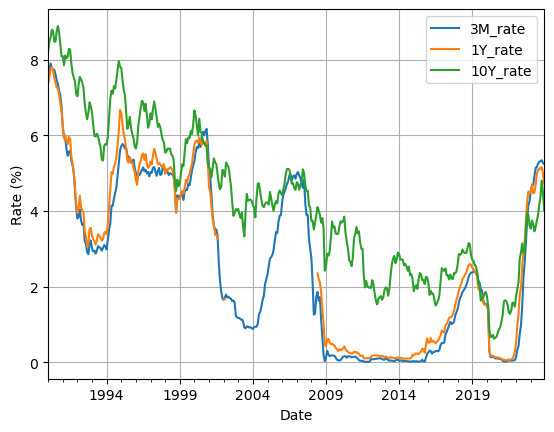

In [7]:
ax = rates.plot()

ax.set_xlabel('Date')
ax.set_ylabel('Rate (%)')
ax.grid()

plt.show()

array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>], dtype=object)

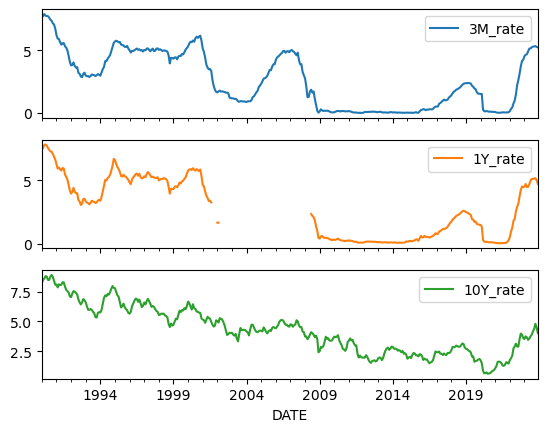

In [8]:
rates.plot(subplots=True)

In [9]:
rates = web.DataReader(name=['TB3MS', 'TB1YR', 'GS10', 'GDP'], data_source='fred',start='1990-01', end='2023-12')
rates

,TB3MS,TB1YR,GS10,GDP
DATE,,,,
1990-01-01,7.64,7.38,8.21,5872.701
1990-02-01,7.74,7.55,8.47,NaN
1990-03-01,7.90,7.76,8.59,NaN
1990-04-01,7.77,7.80,8.79,5960.028
1990-05-01,7.74,7.73,8.76,NaN
...,...,...,...,...
2023-08-01,5.30,5.09,4.17,NaN
2023-09-01,5.32,5.15,4.38,NaN
2023-10-01,5.34,5.15,4.80,28424.722


array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>], dtype=object)

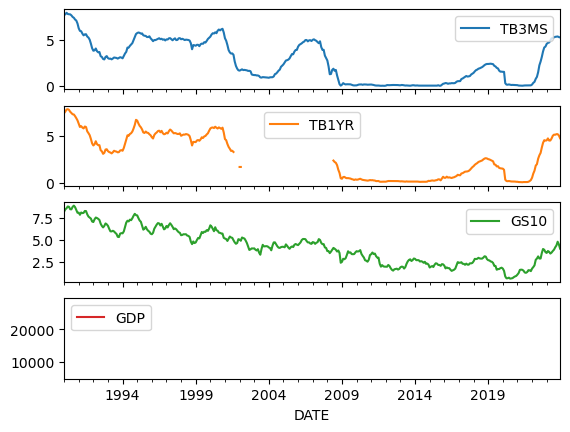

In [10]:
rates.plot(subplots=True)

In [11]:
rate_weekly = web.DataReader(name='WTB3MS', data_source='fred', start='2000-01-01', end='2023-12-31')
rate_weekly

,WTB3MS
DATE,
2000-01-07,5.26
2000-01-14,5.26
2000-01-21,5.31
2000-01-28,5.41
2000-02-04,5.50
...,...
2023-12-01,5.26
2023-12-08,5.25
2023-12-15,5.25


In [12]:
rate_quarterly = rate_weekly.groupby(pd.Grouper(freq='Q')).mean()
rate_quarterly.index = rate_quarterly.index.to_period(freq='Q')
rate_quarterly

,WTB3MS
DATE,
2000Q1,5.526923
2000Q2,5.713077
2000Q3,6.016154
2000Q4,6.017692
2001Q1,4.824615
...,...
2022Q4,4.046154
2023Q1,4.628462
2023Q2,5.080000


In [13]:
rate_quarterly = rate_weekly.groupby(pd.Grouper(freq='Q')).tail(1)
rate_quarterly.index = rate_quarterly.index.to_period(freq='Q')
rate_quarterly

,WTB3MS
DATE,
2000Q1,5.71
2000Q2,5.67
2000Q3,6.03
2000Q4,5.66
2001Q1,4.22
...,...
2022Q4,4.34
2023Q1,4.70
2023Q2,5.20


In [14]:
# Базовые трансформеры
from sktime.transformations.series.boxcox import LogTransformer
from sktime.transformations.series.difference import Differencer
# создание pipeline
from sktime.pipeline import make_pipeline

from sktime.utils.plotting import plot_series

In [15]:
y = web.DataReader(name='M2SL', data_source='fred', start='1990-01')

In [16]:
y

,M2SL
DATE,
1990-01-01,3166.8
1990-02-01,3179.2
1990-03-01,3190.1
1990-04-01,3201.6
1990-05-01,3200.6
...,...
2025-08-01,22108.2
2025-09-01,22211.9
2025-10-01,22297.8


In [17]:
# log-преобразование
transformer = LogTransformer()
y_log = transformer.fit_transform(y)
y_log

,M2SL
DATE,
1990-01-01,8.060477
1990-02-01,8.064385
1990-03-01,8.067808
1990-04-01,8.071406
1990-05-01,8.071094
...,...
2025-08-01,10.003704
2025-09-01,10.008383
2025-10-01,10.012243


In [18]:
# дифференцирование
transformer = Differencer(lags=1, na_handling='drop_na')
y_diff = transformer.fit_transform(y_log)
y_diff

,M2SL
DATE,
1990-02-01,0.003908
1990-03-01,0.003423
1990-04-01,0.003598
1990-05-01,-0.000312
1990-06-01,0.004085
...,...
2025-08-01,0.003607
2025-09-01,0.004680
2025-10-01,0.003860


In [19]:
# создадим pipline из нескольких последовательных преобразований: лог-доходность
pipe = make_pipeline(LogTransformer(), Differencer(lags=1, na_handling='drop_na'))
y_pipe = pipe.fit_transform(y)
y_pipe

,M2SL
DATE,
1990-02-01,0.003908
1990-03-01,0.003423
1990-04-01,0.003598
1990-05-01,-0.000312
1990-06-01,0.004085
...,...
2025-08-01,0.003607
2025-09-01,0.004680
2025-10-01,0.003860


In [20]:
# альтернативные способ создания pipeline
pipe = LogTransformer() * Differencer(lags=1, na_handling='drop_na')
y_pipe = pipe.fit_transform(y)
y_pipe

,M2SL
DATE,
1990-02-01,0.003908
1990-03-01,0.003423
1990-04-01,0.003598
1990-05-01,-0.000312
1990-06-01,0.004085
...,...
2025-08-01,0.003607
2025-09-01,0.004680
2025-10-01,0.003860


In [21]:
pipe = LogTransformer() * Differencer(lags=1, na_handling='drop_na') * Differencer(lags=1, na_handling='drop_na')
y_pipe = pipe.fit_transform(y)
y_pipe

,M2SL
DATE,
1990-03-01,-0.000485
1990-04-01,0.000176
1990-05-01,-0.003911
1990-06-01,0.004397
1990-07-01,-0.000730
...,...
2025-08-01,-0.000309
2025-09-01,0.001073
2025-10-01,-0.000820
